# Analyse cleaned data

In [11]:
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import json
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Tag
import random

import warnings
warnings.filterwarnings('ignore')

In [12]:
def remove_hidden(l):
    return [el for el in l if el[0] != "."]

def get_relative_path_to_dirs(start_path):
    subdirs = [x[1] for x in os.walk(start_path)][0]
    subdirs = remove_hidden(subdirs)
    subdirs = [start_path + "/" + subdir for subdir in subdirs]
    return subdirs

def get_relative_path_to_files(start_path):
    files = [f for f in listdir(start_path) if isfile(join(start_path, f))]
    files = remove_hidden(files)
    files = [start_path + "/" + file for file in files]
    return files

In [13]:
home_articles_directory = "../articles"

subdirs = get_relative_path_to_dirs(home_articles_directory)
subdirs

['../articles/medium',
 '../articles/splinters',
 '../articles/thehistoryblog',
 '../articles/tutorialspoint',
 '../articles/chemistry-blog',
 '../articles/wikihow',
 '../articles/kdnuggets',
 '../articles/smartdatacollective']

In [14]:
dataset = []

onlyfiles = get_relative_path_to_files("../preprocessed")
read_json_list = []
for file in onlyfiles:
    with open(file, 'r') as infile:
        d = json.load(infile)
        d["tfidf"] = pd.DataFrame(d["tfidf"])
        dataset.append(d)

In [15]:
len(dataset)

1089

## Analyse number of words per article and read time

In [16]:
x = [len(el["content"].split(" ")) for el in dataset]

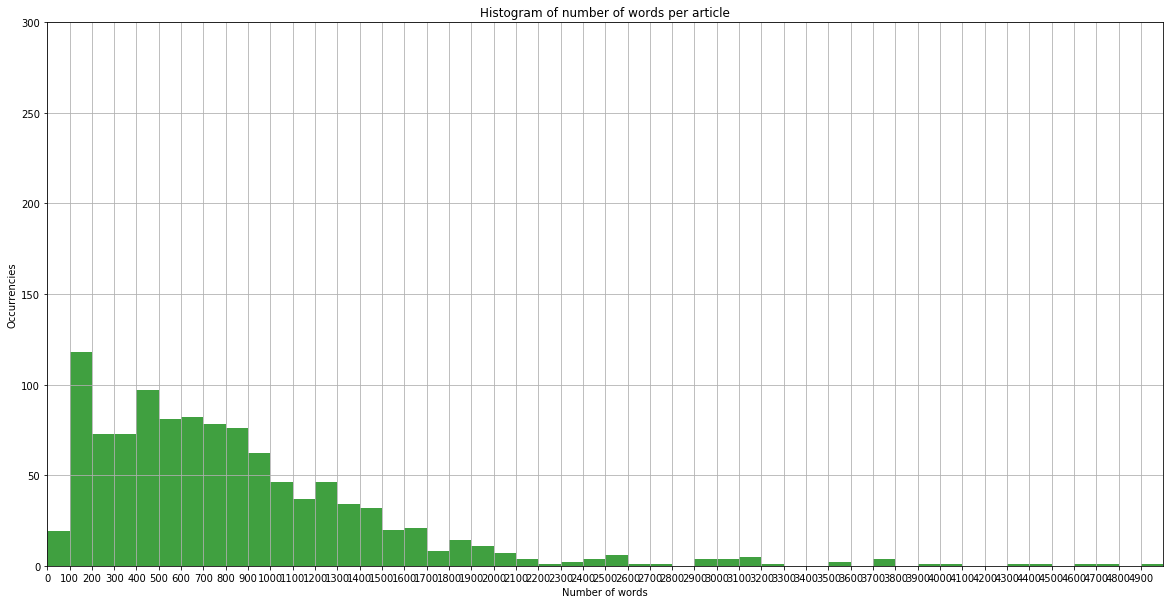

In [17]:
# the histogram of the data
plt.figure(figsize=(20,10))
max_x = 5000
max_y = 300
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, range=(0, max_x), facecolor='g', alpha=0.75)


plt.xlabel('Number of words')
plt.ylabel('Occurrencies')
plt.title('Histogram of number of words per article')
plt.axis([0, max_x, 0, max_y])
plt.xticks([max_x/num_bins*i for i in range(num_bins)])
plt.grid(True)
plt.show()

In [18]:
x = [el["read_time"] for el in dataset]

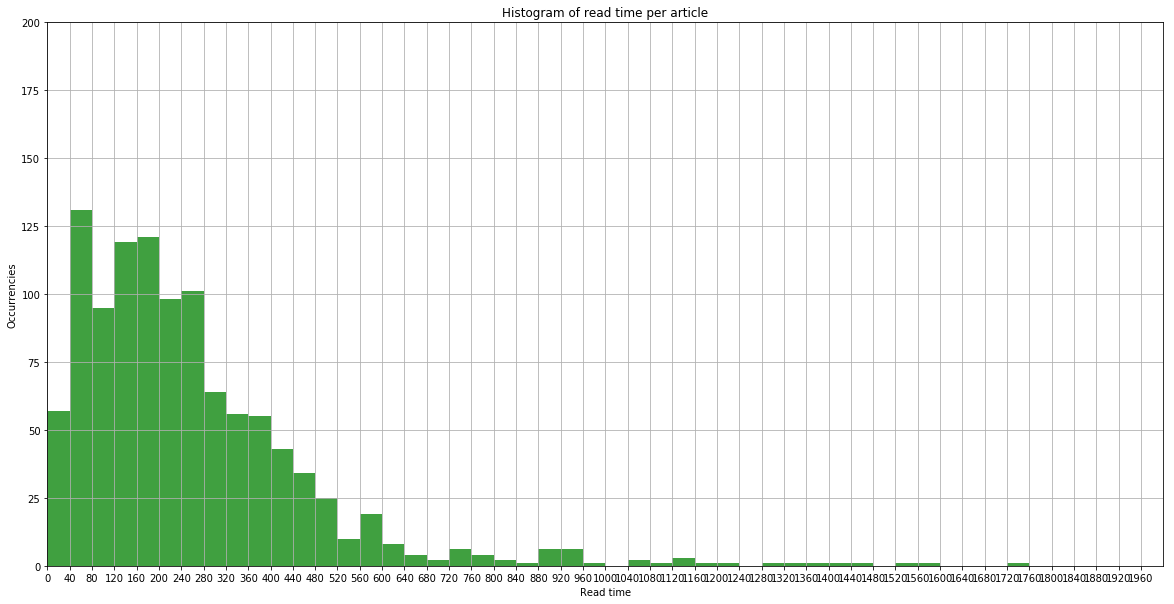

In [20]:
# the histogram of the data
plt.figure(figsize=(20,10))
max_x = 2000
max_y = 200
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, range=(0, max_x), facecolor='g', alpha=0.75)


plt.xlabel('Read time')
plt.ylabel('Occurrencies')
plt.title('Histogram of read time per article')
plt.axis([0, max_x, 0, max_y])
plt.xticks([max_x/num_bins*i for i in range(num_bins)])
plt.grid(True)
plt.show()